In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1- We want to know whether men and women choose different jobs. (and if so which job)


another formualtion of the question is that is there is a relation between the gender and the job type

----
### Hypothesis testing
<pre>If I want to apply hypothesis testing, I will use the following hypothesis:
H_0->the number of women and men in each job type is equal (The ratio between male and female is 1)
H_1-> there at least one job that the number of the females and males differ (The ratio between male and female is not 1)
is it applicale ?
</pre>
    
<pre>
    - The proportion of the female and male freq(male)/freq(female)
</pre>
----

if we constructed table for each job and the number of Males and females in each job
|Job|Male|Female|
|---|---|---|
|Job1|10|20|

we can use chi-square test to test whether males and females choose different jobs or not


In [93]:
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [94]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x =='Male' else 0)
df['Male']=df['Gender'].apply(lambda x: 1 if x ==1 else 0)
df['Female']=df['Gender'].apply(lambda x: 1 if x ==0 else 0)

In [95]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,Male,Female
0,Graphic Designer,0,18,5,College,Operations,2,42363,9938,0,1
1,Software Engineer,1,21,5,College,Management,5,108476,11128,1,0
2,Warehouse Associate,0,19,4,PhD,Administration,5,90208,9268,0,1
3,Software Engineer,1,20,5,Masters,Sales,4,108080,10154,1,0
4,Graphic Designer,1,26,5,Masters,Engineering,5,99464,9319,1,0


In [96]:
Observed=df.groupby(['JobTitle'])[['Male','Female']].sum()
Observed.reset_index(inplace=True)

In [97]:
Observed

,JobTitle,Male,Female
0,Data Scientist,54,53
1,Driver,45,46
2,Financial Analyst,58,49
3,Graphic Designer,50,48
4,IT,46,50
5,Manager,72,18
6,Marketing Associate,11,107
7,Sales Associate,51,43
8,Software Engineer,101,8
9,Warehouse Associate,44,46


----
### Chi Square test steps:
1-Cosntruct contingency table
----

In [98]:
Cont_table=Observed[['Male','Female']]/Observed[['Male','Female']].sum()
Cont_table['JobTitle']=Observed[['JobTitle']]
Cont_table

,Male,Female,JobTitle
0,0.101504,0.113248,Data Scientist
1,0.084586,0.098291,Driver
2,0.109023,0.104701,Financial Analyst
3,0.093985,0.102564,Graphic Designer
4,0.086466,0.106838,IT
5,0.135338,0.038462,Manager
6,0.020677,0.228632,Marketing Associate
7,0.095865,0.091880,Sales Associate
8,0.189850,0.017094,Software Engineer
9,0.082707,0.098291,Warehouse Associate


In [99]:
Cont_table=Cont_table[['JobTitle','Male','Female']]
Cont_table

,JobTitle,Male,Female
0,Data Scientist,0.101504,0.113248
1,Driver,0.084586,0.098291
2,Financial Analyst,0.109023,0.104701
3,Graphic Designer,0.093985,0.102564
4,IT,0.086466,0.106838
5,Manager,0.135338,0.038462
6,Marketing Associate,0.020677,0.228632
7,Sales Associate,0.095865,0.091880
8,Software Engineer,0.189850,0.017094
9,Warehouse Associate,0.082707,0.098291


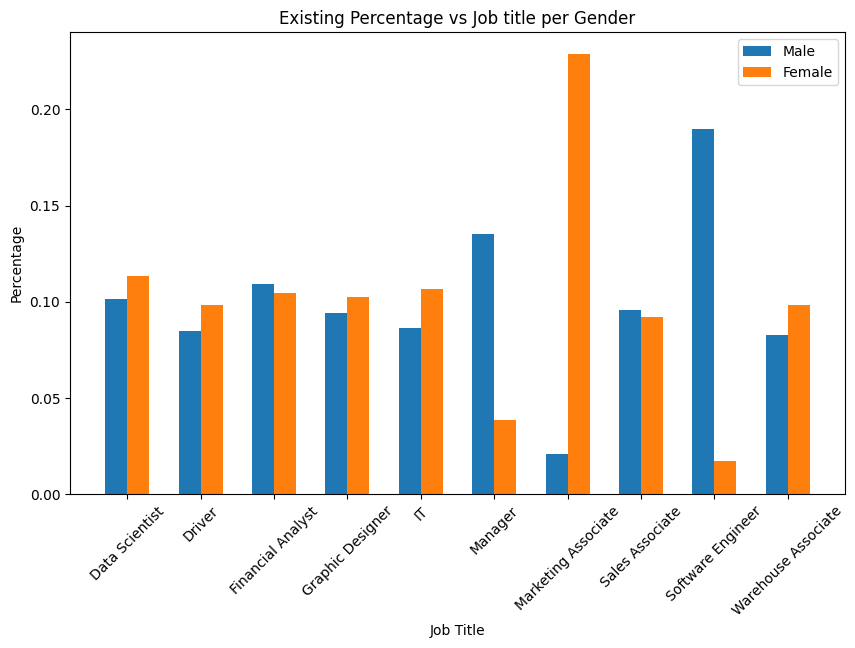

In [100]:
fig, ax = plt.subplots(figsize=(10, 6))

x_male = [i for i in range(len(Cont_table))]
x_female=[i+0.3 for i in range(len(Cont_table))]

barMale = ax.bar(x_male, Cont_table['Male'], 0.3, label='Male')
barFemale = ax.bar(x_female, Cont_table['Female'],0.3, label='Female')

ax.set_xlabel('Job Title')
ax.set_ylabel('Percentage')
ax.set_title('Existing Percentage vs Job title per Gender')
ax.set_xticks([i + 0.3/ 2 for i in range(len(Cont_table))])
ax.set_xticklabels(Cont_table['JobTitle'], rotation=45)
ax.legend()

plt.show()

In [101]:
df=pd.read_csv('Glassdoor Gender Pay Gap.csv')
Cont_table=pd.crosstab(df['JobTitle'],df['Gender'])
Cont_table

Gender,Female,Male
JobTitle,,
Data Scientist,53,54
Driver,46,45
Financial Analyst,49,58
Graphic Designer,48,50
IT,50,46
Manager,18,72
Marketing Associate,107,11
Sales Associate,43,51
Software Engineer,8,101


----
### Chi Square test steps:
2-Use scipy scipy.stats.chi2_contingency() function
    
    Function Input: Cont table DF, which is the contingency table.

    Function output: 

            chi2 Value
            p value
            degrees of freedom
            expected frequencies

expected_freqndarray, same shape as observed
The expected frequencies, based on the marginal sums of the table.
----


In [102]:
import scipy.stats

In [103]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(Cont_table)
print(f"{'-'*20}Chi Square test results{'-'*20}\n chi=square value:{chi2}\n\n P-Value:{p}\n\ndegrees of freedom:{dof}\n\n Expected frequencies: {expected}")

--------------------Chi Square test results--------------------
 chi=square value:188.23545384004152

 P-Value:9.631049089256313e-36

degrees of freedom:9

 Expected frequencies: [[50.076 56.924]
 [42.588 48.412]
 [50.076 56.924]
 [45.864 52.136]
 [44.928 51.072]
 [42.12  47.88 ]
 [55.224 62.776]
 [43.992 50.008]
 [51.012 57.988]
 [42.12  47.88 ]]


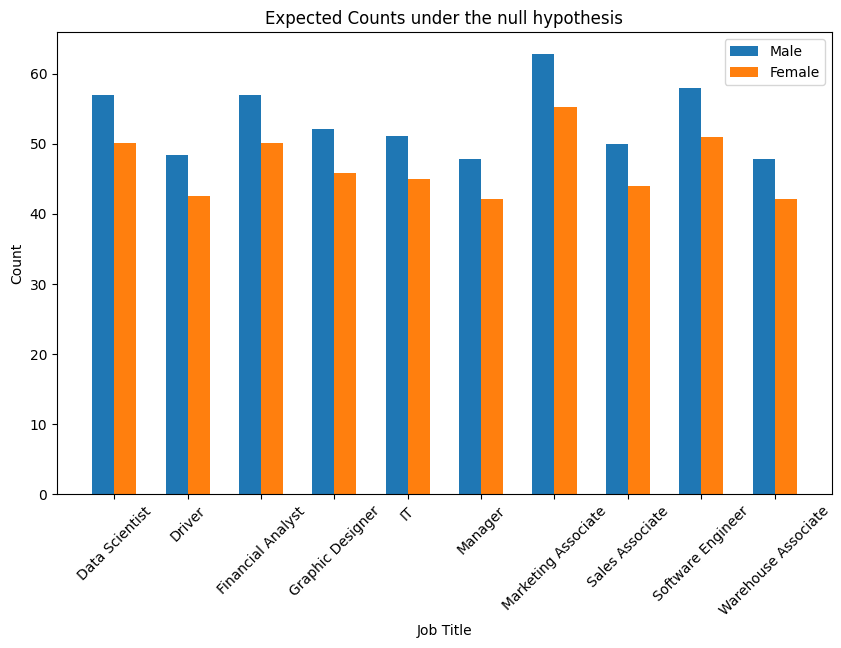

In [104]:
Expected=pd.DataFrame(expected,columns=['Female','Male'])
Expected['JobTitle']=Observed['JobTitle']
Expected

fig, ax = plt.subplots(figsize=(10, 6))

x_male = [i for i in range(len(Expected))]
x_female=[i+0.3 for i in range(len(Expected))]

barMales = ax.bar(x_male, Expected['Male'], 0.3, label='Male')
barFemales = ax.bar(x_female, Expected['Female'],0.3, label='Female')

ax.set_xlabel('Job Title')
ax.set_ylabel('Count')
ax.set_title('Expected Counts under the null hypothesis')
ax.set_xticks([i + 0.3 / 2 for i in range(len(Expected))])
ax.set_xticklabels(Expected['JobTitle'], rotation=45)
ax.legend()

plt.show()

----
The difference between the expected count and the existing count can be seen from both bar charts above
----
The p value is very small, which means that the **probability** we get the existing count given that the null hypothesis (The expected counts above) (men and women choose jobs equally) is true is **very low**
If we assume a significance level (α) of 0.01, which is the smallest common value, the p value will still be smaller, which means we reject the null hypothesis

The degrees of freedom calculated by the function above is 9, we can also manually calculate it:

    1-We have two variables, Gender (ng=2) and JobTitle(nj=10)
    2-Degrees of freedom needed= (ng-1)*(nj-1)=1*9=9

The chi-squared value obtained is 188.2, which we can compare to the critical chi-squared value at 9 degrees of freedom which =21.67 whici means the
chi-squared obtained is significantly larger than the critical value, so we reject the null hypothesis.


----
From data visualization, there are three main categories to investigate:
    
   
    1-Manager
    
    2-Marketing Associate
    
    3-Software Engineer
----

For every category, we will conduct difference between two proportions test, meaning we will do hypothesis testing where the **null hypothesis** assumes
the two samples(men and women in every job) are from the same population (equally distributed)

In [105]:
Cont_table

Gender,Female,Male
JobTitle,,
Data Scientist,53,54
Driver,46,45
Financial Analyst,49,58
Graphic Designer,48,50
IT,50,46
Manager,18,72
Marketing Associate,107,11
Sales Associate,43,51
Software Engineer,8,101


In [106]:
Observed

,JobTitle,Male,Female
0,Data Scientist,54,53
1,Driver,45,46
2,Financial Analyst,58,49
3,Graphic Designer,50,48
4,IT,46,50
5,Manager,72,18
6,Marketing Associate,11,107
7,Sales Associate,51,43
8,Software Engineer,101,8
9,Warehouse Associate,44,46


----
Manager
----
**Conditions for CLT for difference  of proportions**
    
    Independence within groups:
        Randomly sampling women and randomly sampling men and women.
    Independence between groups:
        The sampled men and women are  independent of each other.
    np condition:
        np and n(1-p) >10 in the two groups.



In [107]:
Observed

,JobTitle,Male,Female
0,Data Scientist,54,53
1,Driver,45,46
2,Financial Analyst,58,49
3,Graphic Designer,50,48
4,IT,46,50
5,Manager,72,18
6,Marketing Associate,11,107
7,Sales Associate,51,43
8,Software Engineer,101,8
9,Warehouse Associate,44,46


In [108]:
ObservedM=Observed.drop(labels=5,axis=0)
ObservedM

,JobTitle,Male,Female
0,Data Scientist,54,53
1,Driver,45,46
2,Financial Analyst,58,49
3,Graphic Designer,50,48
4,IT,46,50
6,Marketing Associate,11,107
7,Sales Associate,51,43
8,Software Engineer,101,8
9,Warehouse Associate,44,46


In [109]:
sum=pd.Series(ObservedM.sum())
sum

JobTitle    Data ScientistDriverFinancial AnalystGraphic D...
Male                                                      460
Female                                                    450
dtype: object

In [114]:
tmp=Observed.copy()
tmp.loc[10]=sum
Obs=tmp.copy()
Obs['JobTitle'][10]='SumTheRest'
Obs=Obs.drop(list(np.arange(0,5))+list(np.arange(6,10)))


In [115]:
Obs.reset_index(inplace=True)
Obs

,index,JobTitle,Male,Female
0,5,Manager,72,18
1,10,SumTheRest,460,450


In [116]:
Obs.drop('index',axis=1,inplace=True)

In [117]:
Obs

,JobTitle,Male,Female
0,Manager,72,18
1,SumTheRest,460,450


In [119]:
phat=pd.Series(Obs.T[0][['Male','Female']]/(Obs.T[0][['Male','Female']]+Obs.T[1][['Male','Female']]))
Obs.loc[3]={"JobTitle":"Phat","Male":phat[0],"Female":phat[1]}
Obs['JobTitle'][2]='Phat'

Obs

,JobTitle,Male,Female
0,Manager,72.000000,18.000000
1,SumTheRest,460.000000,450.000000
3,Phat,0.135338,0.038462


In [120]:
print(f"{'-'*20}CLT conditions{'-'*20}\n Indepencance and large sample size (10% cdn) are met\n\n\
np(male)= {(72+460)*Obs[Obs['JobTitle']=='Phat']['Male']} and \n\n(1-p)(male)={(72+460)*(1-Obs[Obs['JobTitle']=='Phat']['Male'])}\
\n\nnp(female)={(18+450)*Obs[Obs['JobTitle']=='Phat']['Female']} and \n\n(1-p)(Female)={(18+450)*(1-Obs[Obs['JobTitle']=='Phat']['Female'])}")

--------------------CLT conditions--------------------
 Indepencance and large sample size (10% cdn) are met

np(male)= 3    72.0
Name: Male, dtype: float64 and 

(1-p)(male)=3    460.0
Name: Male, dtype: float64

np(female)=3    18.0
Name: Female, dtype: float64 and 

(1-p)(Female)=3    450.0
Name: Female, dtype: float64


In [ ]:
print(f"{'*'*20}CLT applies{'*'*20}")

********************CLT applies********************


In [121]:
Obs.iloc[0]['Male']+Obs.iloc[1]['Male']

532.0

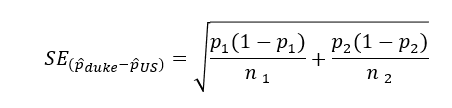

In [122]:
phat_male=Obs.iloc[2]['Male']
phat_female=Obs.iloc[2]['Female']
n_male=Obs.iloc[0]['Male']+Obs.iloc[1]['Male']
n_female=Obs.iloc[0]['Female']+Obs.iloc[1]['Female']

SE=np.sqrt(((phat_male*(1-phat_male))/(n_male))+((phat_female*(1-phat_female)/(n_female))))

In [123]:
SE

0.01729126469188748

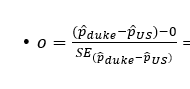

In [124]:
Z=(phat_male-phat_female)/SE
Z

5.602644406257615

In [125]:
p_right=1-scipy.stats.norm.cdf(Z)
p_right

1.0555301410697382e-08

----
Null hypothesis: men and women choose the 'Manager' title equally
----

The p value under the null hypothesis is very small, smaller than the significance level (0.01) so we **reject the null hypothesis**.
We did right tail test to prove that men choose the 'Manager' title more than women. And since the pvalue is very small, the alternative hypothesis is true.



----
Type I error for all tests= Significance level = 0.01
----


----
Type II Error
----
To calculate it, we go through all job titles to see which ones will not reject the null hypothesis, which means type II error for this title.

In [ ]:
print(f"{'*'*20}Type II error for Manager{'*'*20}\n{p_right}")

********************Type II error for Manager********************
1.0555301410697382e-08


----
Marketing Associate
----
**Conditions for CLT for difference  of proportions**
    
    Independence within groups:
        Randomly sampling women and randomly sampling men and women.
    Independence between groups:
        The sampled men and women are  independent of each other.
    np condition:
        np and n(1-p) >10 in the two groups.



In [127]:
ObservedMA=Observed.drop(labels=6,axis=0)
sm=pd.Series(ObservedMA.sum())
sm

JobTitle    Data ScientistDriverFinancial AnalystGraphic D...
Male                                                      521
Female                                                    361
dtype: object

In [ ]:
Obs2=Observed.append(sum,ignore_index=True)
Obs2['JobTitle'][10]='SumTheRest'
Obs2=Obs2.T
Obs2.drop(columns=[0,1,2,3,4,5,7,8,9],axis=0,inplace=True)
Obs2=Obs2.T
Obs2

,JobTitle,Male,Female
6,Marketing Associate,11,107
10,SumTheRest,521,361


In [ ]:

phat=pd.Series(Obs2.T[6][['Male','Female']]/(Obs2.T[6][['Male','Female']]+Obs2.T[10][['Male','Female']]))
Obs2=Obs2.append(phat.T,ignore_index=True)
Obs2['JobTitle'][2]='Phat'

In [ ]:
print(f"{'-'*20}CLT conditions{'-'*20}\n Indepencance and large sample size (10% cdn) are met\n\n\
np(male)={(11+521)*Obs2[Obs2['JobTitle']=='Phat']['Male']} and \n\n(1-p)(male)={(11+521)*(1-Obs2[Obs2['JobTitle']=='Phat']['Male'])}\
\n\nnp(female)={(107+361)*Obs2[Obs2['JobTitle']=='Phat']['Female']} and \n\n(1-p)(Female)={(107+361)*(1-Obs2[Obs2['JobTitle']=='Phat']['Female'])}")

print(f"\n\n{'*'*20}CLT applies{'*'*20}")

--------------------CLT conditions--------------------
 Indepencance and large sample size (10% cdn) are met

np(male)=2    11.0
Name: Male, dtype: object and 

(1-p)(male)=2    521.0
Name: Male, dtype: object

np(female)=2    107.0
Name: Female, dtype: object and 

(1-p)(Female)=2    361.0
Name: Female, dtype: object


********************CLT applies********************


In [ ]:
phat_male=Obs2.iloc[2]['Male']
phat_female=Obs2.iloc[2]['Female']
n_male=Obs2.iloc[0]['Male']+Obs2.iloc[1]['Male']
n_female=Obs2.iloc[0]['Female']+Obs2.iloc[1]['Female']

SE=np.sqrt(((phat_male*(1-phat_male))/(n_male))+((phat_female*(1-phat_female)/(n_female))))

In [ ]:
Z=(phat_male-phat_female)/SE
p_right=1-scipy.stats.norm.cdf(Z)

In [ ]:
p_right

8.99986789317581e-25

----
Null hypothesis: men and women choose the 'Marketing Associate' title equally
----

The p value under the null hypothesis is very small, smaller than the significance level (0.01) so we **reject the null hypothesis**.
We did one tail test to prove that women choose the 'Marketing Associate' title more than men. And since the pvalue is very small, the alternative hypothesis is true.



----
Type II Error
----
To calculate it, we go through all job titles to see which ones will not reject the null hypothesis, which means type II error for this title.

In [ ]:
Observed

,JobTitle,Male,Female
0,Data Scientist,54,53
1,Driver,45,46
2,Financial Analyst,58,49
3,Graphic Designer,50,48
4,IT,46,50
5,Manager,72,18
6,Marketing Associate,11,107
7,Sales Associate,51,43
8,Software Engineer,101,8
9,Warehouse Associate,44,46


In [ ]:
SW=Observed.drop(labels=8,axis=0)
SW

,JobTitle,Male,Female
0,Data Scientist,54,53
1,Driver,45,46
2,Financial Analyst,58,49
3,Graphic Designer,50,48
4,IT,46,50
5,Manager,72,18
6,Marketing Associate,11,107
7,Sales Associate,51,43
9,Warehouse Associate,44,46


In [ ]:
SW.loc[len(SW)]={"JobTitle":"Sum", "Male": SW['Male'].sum(), "Female":SW['Female'].sum()}

JobTitle    Sum
Male        431
Female      460
Name: 9, dtype: object

In [153]:
Obs3=Observed.copy()
Obs3.drop([i for i in range (len(Observed)) if i !=8], axis=0,inplace=True)

In [154]:
Obs3.reset_index(inplace=True)

In [155]:
Obs3.loc[2]=SW.loc[9]
Obs3.drop('index',axis=1,inplace=True)

In [156]:
Obs3

,JobTitle,Male,Female
0,Software Engineer,101,8
2,Sum,431,460


In [157]:
Obs3.loc[3]={"JobTitle":"Phat", "Male":Obs3.loc[0][1]/ (Obs3.loc[2][1]+Obs3.loc[0][1])  ,"Female":Obs3.loc[0][2]/ (Obs3.loc[2][2]+Obs3.loc[0][2])}

In [160]:
Obs3

,JobTitle,Male,Female
0,Software Engineer,101.00000,8.000000
2,Sum,431.00000,460.000000
3,Phat,0.18985,0.017094


In [159]:
print(f"{'-'*20}CLT conditions{'-'*20}\n Indepencance and large sample size (10% cdn) are met\n\n\
np(male)={(101+431)*Obs3[Obs3['JobTitle']=='Phat']['Male']} and \n\n(1-p)(male)={(101+431)*(1-Obs3[Obs3['JobTitle']=='Phat']['Male'])}\
\n\nnp(female)={(8+460)*Obs3[Obs3['JobTitle']=='Phat']['Female']} and \n\n(1-p)(Female)={(8+460)*(1-Obs3[Obs3['JobTitle']=='Phat']['Female'])}")


--------------------CLT conditions--------------------
 Indepencance and large sample size (10% cdn) are met

np(male)=3    101.0
Name: Male, dtype: float64 and 

(1-p)(male)=3    431.0
Name: Male, dtype: float64

np(female)=3    8.0
Name: Female, dtype: float64 and 

(1-p)(Female)=3    460.0
Name: Female, dtype: float64


----
### CLT DOES NOT APPLY
----